# 1번 문제

### (1) customer 데이터를 k-means clustering 모델을 활용하여 4개의 그룹으로 군집화하세요. 
- mall_customer 데이터 불러오기
- 성별(Gender)을 남자는 0, 여자는 1로 변환하기.
- 4개의 군집으로 clustering하기.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
customer=pd.read_csv('mall_customers.csv')
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customer['Gender']=customer['Gender'].map({'Male':0, 'Female':1})

In [9]:
kmeans=KMeans(n_clusters=4, init='k-means++',max_iter=300, random_state=0)
kmeans.fit(customer)

customer['cluster']=kmeans.labels_
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,3
3,4,1,23,16,77,3
4,5,1,31,17,40,3


#### (2) (1)에서 수행한 customer 군집를 시각화하세요.
- 2차원 평면에 나타내기 위해 pca를 사용하여 2개의 주성분 구하기.
- 각 주성분 값을 인덱스로 지정하고, scatter plot 그리기.

In [10]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed = pca.fit_transform(customer)

In [11]:
customer['pca_x']=pca_transformed[:,0]
customer['pca_y']=pca_transformed[:,1]
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,pca_x,pca_y
0,1,0,19,15,39,3,-109.392502,5.478653
1,2,0,21,15,81,3,-108.213197,-34.924904
2,3,1,20,16,6,3,-107.383609,37.835061
3,4,1,23,16,77,3,-106.018096,-30.557086
4,5,1,31,17,40,3,-104.989062,7.295784


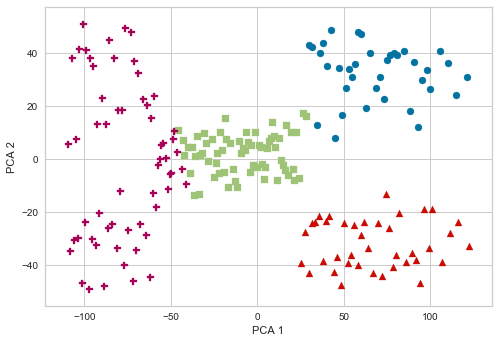

In [12]:
# 각 클러스터에 해당하는 index 추출
marker0_ind = customer[customer['cluster']==0].index
marker1_ind = customer[customer['cluster']==1].index
marker2_ind = customer[customer['cluster']==2].index
marker3_ind = customer[customer['cluster']==3].index

# 각 클러스터에 해당하는 index로 각 cluster레벨의 pca_x, pca_y값 추출
plt.scatter(x=customer.loc[marker0_ind,'pca_x'],y=customer.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=customer.loc[marker1_ind,'pca_x'],y=customer.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=customer.loc[marker2_ind,'pca_x'],y=customer.loc[marker2_ind,'pca_y'],marker='^')
plt.scatter(x=customer.loc[marker3_ind,'pca_x'],y=customer.loc[marker3_ind,'pca_y'],marker='P')

plt.xlabel('PCA 1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 2번 문제

### (1) make_blobs를 적용한 뒤 데이터 세트와 군집 분포 확인하세요.
- 생성할 총 데이터 수 : 300
- 데이터의 피처 수 : 2
- 군집 수 : 5
- 생성될 군집 데이터의 표준편차 : 0.8, 1.1, 1.2, 0.4, 0.5 순서대로 이용
- random_state = 0

In [13]:
from sklearn.datasets import make_blobs

In [14]:
X, y=make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=[0.8, 1.1, 1.2, 0.4, 0.5], random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(300, 2) (300,)
[0 1 2 3 4] [60 60 60 60 60]


### (2) 생성된 데이터 셋을 데이터프레임으로 변경하세요. (피처의 이름은 ftr1, ftr2)

In [15]:
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,9.823397,-1.682159,4
1,-0.796818,8.033860,3
2,0.420616,4.184080,0


### (3) make_blobs()으로 만든 피처 데이터 세트의 군집화 분포 확인하세요
- markers = ['o','s', '^', 'P', 'D'] 이용하세요

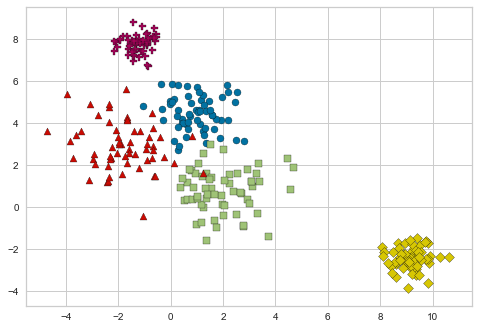

In [16]:
target_list = np.unique(y)  # array([0, 1, 2, 3, 4])

markers=['o', 's','^','P','D']

# target별로 marker 지정하고, scatter plot 그리기
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])

plt.show()

### (4) Kmeans 군집화를 수행하세요
- n_clusters = 5, init = 'k-means++', max_iter=200, random_state=0 
- Target과 cluster 매핑 결과 확인하세요


In [17]:
# X데이터 k-means 클러스터링 수행
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
clusterDF.head(3)

,ftr1,ftr2,target,kmeans_label
0,9.823397,-1.682159,4,1
1,-0.796818,8.033860,3,2
2,0.420616,4.184080,0,0


In [18]:
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               58
        2                1
        3                1
1       4               57
        0                3
2       3               55
        0                2
        4                2
        2                1
3       2               60
4       1               60
Name: kmeans_label, dtype: int64

# 3번 문제

### 1) Customer 데이터에 대해 SSE와 Silhouette_score 그래프를 통해 최적의 군집범위를 도출하세요.
* 주의사항: 위의 customer 데이터프레임을 그대로 사용할 시, 추가한 열들이 하나의 속성으로 인식될 수 있으므로 원본 데이터를 .copy()하는 방식을 추천

In [54]:
customer1=customer.copy()
customer1=customer1.drop(customer1[['pca_x','pca_y', 'cluster']], axis=1)
customer1.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6


In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

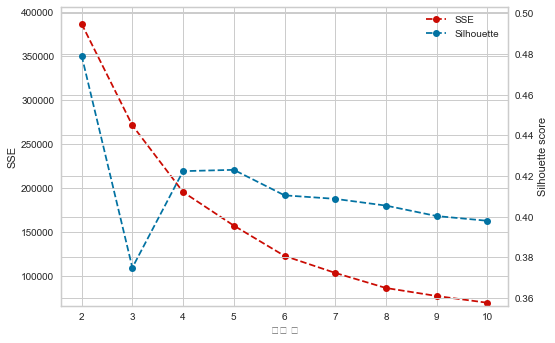

In [56]:
wss=[]
sis=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer1)
    wss=np.append(wss, kmeans.inertia_)
    sis=np.append(sis, silhouette_score(customer1, kmeans.labels_))

flg,ax1=plt.subplots()
ax2=ax1.twinx()

line1=ax1.plot(np.arange(2,11),wss,'ro--',label='SSE')
line2=ax2.plot(np.arange(2,11),sis,'bo--',label='Silhouette')

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05)
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05)

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines=line1+line2
labels=[l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()


# SSE와 Silhouette score 그래프를 바탕으로 Elbow 기법을 활용하면
# cust 데이터의 최적 군집 범위는 2, 3, 4, 5로 정함

### (2) 최적의 군집범위 내에서 Silhouette 그래프를 활용해 최적의 군집 수를 도출하세요.
- from yellowbrick.cluster import silhouette_visualizer 을 사용
- 파라미터: silhouette_visualizer(KMeans(군집의 개수, random_state=0), 데이터, colors = 'yellowbrick')

In [42]:
# conda install -c districtdatalabs yellowbrick

^C

Note: you may need to restart the kernel to use updated packages.


In [57]:
from yellowbrick.cluster import silhouette_visualizer

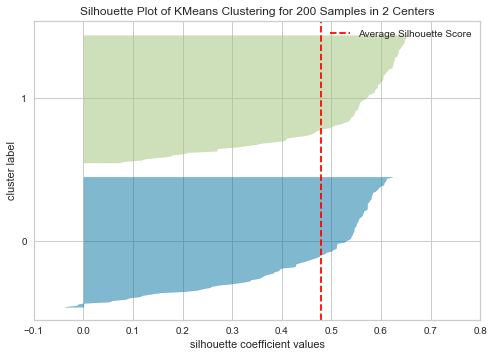

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001B41DC12320>,
           colors='yellowbrick', is_fitted='auto', model=None)

In [58]:
silhouette_visualizer(KMeans(2, random_state=0), customer1, colors = 'yellowbrick')

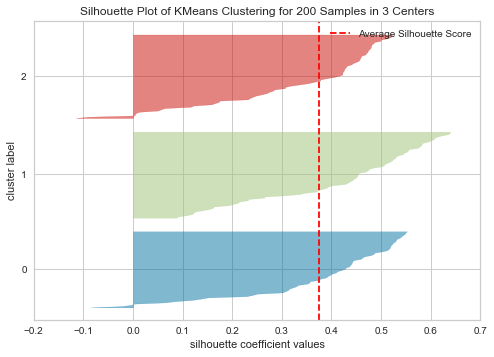

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001B41DA63BE0>,
           colors='yellowbrick', is_fitted='auto', model=None)

In [59]:
silhouette_visualizer(KMeans(3, random_state=0), customer1, colors = 'yellowbrick')

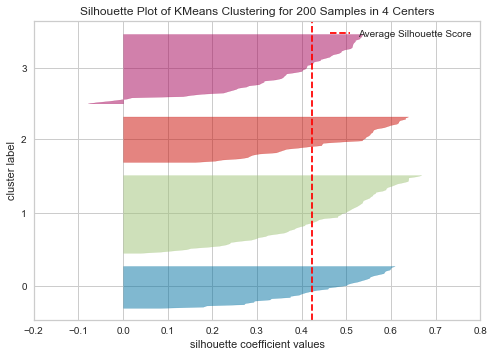

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001B41DCC9A58>,
           colors='yellowbrick', is_fitted='auto', model=None)

In [60]:
silhouette_visualizer(KMeans(4, random_state=0), customer1, colors = 'yellowbrick')

### (3)최적의 군집 수를 활용한 K-Means 후 군집별 Silhouette score 평균을 도출하세요.

In [76]:
# X데이터 k-means 클러스터링 수행
kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter=300, random_state=0).fit(customer1)

customer1['cluster'] = kmeans.labels_
customer1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,silhouette_coeff
0,1,0,19,15,39,1,0.522543
1,2,0,21,15,81,1,0.502909
2,3,1,20,16,6,1,0.442030
3,4,1,23,16,77,1,0.520249
4,5,1,31,17,40,1,0.549046


In [77]:
# 모든 개별 데이터에 실루엣 계수값을 구함
score_samples=silhouette_samples(customer1,customer1['cluster'])
customer1['silhouette_coeff']=score_samples

# silhouette_score: 모든 데이터의 실루엣 계수값을 평균
average_score=silhouette_score(customer1, customer1['cluster'])
print('cusomer1 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

# 군집별 실루엣 스코어 평균
customer1.groupby('cluster')['silhouette_coeff'].mean()

cusomer1 데이터셋 Silhouette Analysis Score:0.479


cluster
0    0.444979
1    0.514387
Name: silhouette_coeff, dtype: float64

# 4번 문제
### Customer 데이터에서 연봉과 고객 소비 지수에 대해 평균이동을 이용한 군집화를 진행해주세요

### (1) Annual Income열과 Spending Score 열만 추출한 후 정규화 해주세요.

In [183]:
customer2=pd.read_csv('mall_customers.csv')
customer2=customer2.drop(customer2[['CustomerID','Gender','Age']], axis=1)
customer2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(customer2)
customer2 = scaler.transform(customer2)
customer2

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### (2) estimate_bandwidth를 이용하여 최적의 대역폭을 구한 후 그에 따른 군집화의 분류 개수를 구하세요
- cluster label 유형: [ , , ]

In [195]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [196]:
best_bandwidth=estimate_bandwidth(customer2)
meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(customer2)

print('cluster labels 유헝:', np.unique(cluster_labels))

cluster labels 유헝: [0]


Estimate_bandwidth()를 하면 적절한 대역폭을 반환해줌
but 그 역할을 하지 못할 때가 있음
Make_blobs 를 통해 임의로 데이터셋을 많이 만들고, 평균이동을 하는 실습과정 거쳐야함.

In [210]:
X, y = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1, 
                  shuffle=True, random_state=1)  

best_bandwidth = estimate_bandwidth(X)
meanshift=MeanShift(best_bandwidth)
cluster_labels=meanshift.fit_predict(X)

print('cluster labels 유형', np.unique(cluster_labels))
print('best_bandwidth', best_bandwidth)

cluster labels 유형 [0 1]
best_bandwidth 3.928897303264249


In [211]:
meanshift = MeanShift(bandwidth=3.928897303264249)
cluster_labels=meanshift.fit_predict(customer2)

print('cluster label 유형', np.unique(cluster_labels))

cluster label 유형 [0]


### (3) bandwidth 값을 0.95로 설정하여 도출된 군집을 시각화하세요

In [203]:
best_bandwidth=estimate_bandwidth(customer2)
meanshift=MeanShift(bandwidth=0.95)
cluster_labels=meanshift.fit_predict(customer2)

print('cluster labels 유헝:', np.unique(cluster_labels))

cluster labels 유헝: [0 1 2 3 4]


In [208]:
clusterDF=pd.DataFrame(data=customer2, columns=['ftr1','ftr2'])

clusterDF['meanshift_label']  = cluster_labels
clusterDF.head(3)

,ftr1,ftr2,meanshift_label
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,3


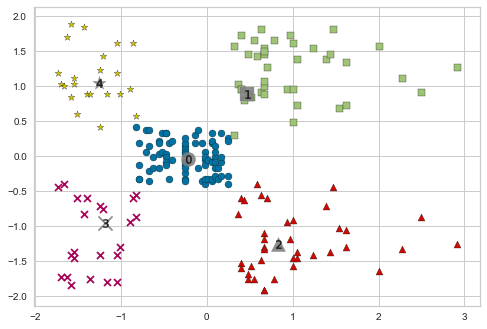

In [209]:
markers=['o', 's', '^', 'x', '*']

unique_labels = np.unique(cluster_labels)

# 군집별로 시각화
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()